# Analysis

In this notebook we will analyse the models that we created.

The analysis consists of:

1) comparing the perplexity and the accuracy between the rationalized and non-rationalized model 

2) Checking the change in perplexity when removing even more from the rational

3) Checking the distribution of rationals

4) Qualitative analysis of the some examples

## Setup

In [1]:
#First we fix the relative imports
import os
import sys
# M
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
    
#Make sure we are in the top folder. 
os.chdir(os.path.join('..'))

In [2]:
### We load the models based on the configs for analysis. 
from utils.analysis import parse_config_for_analysis
config_path = 'configs/random_50_RE_config.yml'

loaded_info = parse_config_for_analysis(config_path)


C:\Users\gerso\projects\rational-dialog-model\utils\analysis.py:24: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


./daily_dialog/tokenizer.json
200


Using custom data configuration default
Reusing dataset daily_dialog (C:\Users\gerso\.cache\huggingface\datasets\daily_dialog\default\1.0.0\c03444008e9508b8b76f1f6793742d37d5e5f83364f8d573c2747bff435ea55c)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


load pretrained_model:  ./models/small_lm.pt
load pretrained_model:  ./models/small_lm_token_random_50_rationalized.pt
2


## Perplexity and Accuracy

In [16]:
lm_RE = loaded_info["lightning_language_model_RE"].to("cuda")
lm = loaded_info["lightning_language_model_no_RE"].to("cuda")
tokenizer = loaded_info["tokenizer"]
dataloader_test = loaded_info["dataloader_test"]



RandomRationalExtractor()


In [4]:
### First thing we compare the perplexity and accuracy on the testset.
from utils.analysis import get_results, get_results_RE


lm_RE_result = get_results_RE(lm_RE, dataloader_test, 1)
lm_result = get_results(lm, dataloader_test)
print(lm_RE_result)
print(lm_result)


  0%|                                                                                          | 0/184 [00:00<?, ?it/s]C:\Users\gerso\anaconda3\envs\CDM\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
100%|███████████████████████████████████████████████████████████████████████████████| 184/184 [00:01<00:00, 170.83it/s]

{'mean_acc': {'mean': 0.3702232229052311, 'std': 0.0}, 'mean_perplexity': {'mean': 29.412856133800542, 'std': 0.0}, 'mean_mask_percentage': {'mean': 0.4986325600587079, 'std': 0.0}}
{'mean_acc': 0.38537945775372195, 'mean_perplexity': 25.526450388929813, 'mean_mask_percentage': 0}


## Change in perplexity

In [5]:
### Next we test what happens if we check te change in perplexity of the RE. 
# from utils.analysis import calc_change_in_perplexity_experiment
# change_in_perplexity = calc_change_in_perplexity_experiment(lm_RE, dataloader_test, n_experiments=10, n_extra_mask=2)
# change_in_perplexity

## Distribution of mask

In [6]:
from utils.analysis import rational_analysis

rational_distributions = rational_analysis(lm_RE, dataloader_test, greedy=False)
print(rational_distributions)

{'abs_average': 0.0, 'rel_average': 0.0, 'abs_pos_count': Counter({2.0: 3040, 1.0: 2988, 3.0: 2965, 6.0: 2957, 7.0: 2953, 4.0: 2950, 8.0: 2908, 5.0: 2892, 9.0: 2859, 10.0: 2829, 11.0: 2783, 13.0: 2759, 12.0: 2699, 14.0: 2698, 16.0: 2640, 19.0: 2595, 15.0: 2591, 17.0: 2531, 18.0: 2528, 20.0: 2465, 23.0: 2408, 21.0: 2406, 24.0: 2356, 25.0: 2340, 26.0: 2322, 22.0: 2319, 28.0: 2236, 27.0: 2230, 29.0: 2202, 30.0: 2177, 32.0: 2110, 31.0: 2095, 33.0: 2076, 35.0: 2058, 34.0: 2023, 38.0: 2005, 39.0: 1974, 36.0: 1966, 37.0: 1962, 41.0: 1878, 40.0: 1857, 43.0: 1804, 42.0: 1801, 44.0: 1782, 47.0: 1761, 45.0: 1760, 46.0: 1747, 48.0: 1676, 51.0: 1635, 49.0: 1630, 50.0: 1603, 52.0: 1582, 53.0: 1559, 54.0: 1537, 55.0: 1502, 56.0: 1498, 59.0: 1459, 57.0: 1457, 58.0: 1422, 60.0: 1406, 61.0: 1397, 62.0: 1375, 63.0: 1364, 64.0: 1319, 65.0: 1284, 66.0: 1279, 67.0: 1252, 68.0: 1224, 70.0: 1193, 69.0: 1173, 72.0: 1155, 73.0: 1150, 71.0: 1141, 76.0: 1129, 74.0: 1109, 75.0: 1088, 78.0: 1059, 77.0: 1050, 79.0: 

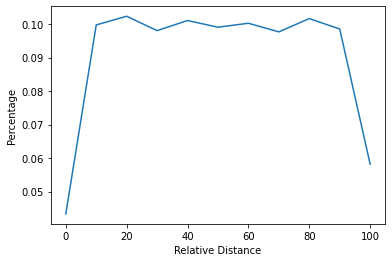

In [7]:
import matplotlib.pyplot as plt
relative_counts = rational_distributions["rel_pos_count"]
total = sum(relative_counts.values())
X = [int(k) for k in relative_counts.keys()] 
Y = [r/total for r in relative_counts.values()]

pairs = sorted([(x,y) for x,y in zip(X, Y)], key=lambda p: p[0])
plt.xlabel
X_sorted = [p[0] for p in pairs]
Y_sorted = [p[1] for p in pairs]
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.plot(X_sorted, Y_sorted, "")


<BarContainer object of 11 artists>

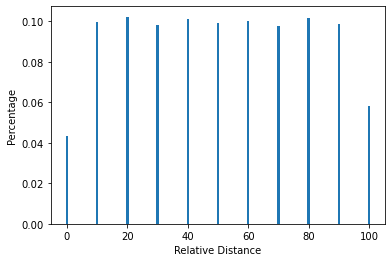

In [8]:
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.bar(X, Y)

<BarContainer object of 194 artists>

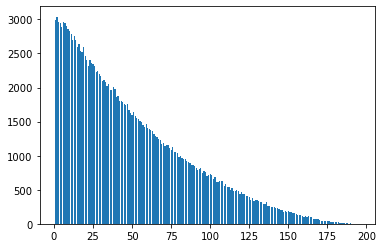

In [9]:
abs_pos_count = rational_distributions["abs_pos_count"]
plt.bar(abs_pos_count.keys(),abs_pos_count.values())

## Analysing some examples

In [10]:
examples = ["How are you doing? [SEP]", "What did you do today? [SEP]", "How's work? [SEP]", "Would you like some coffee? [SEP]"]

In [11]:
## First with greedy rationals
completed_dialogues_chance = lm_RE.complete_dialogues(examples, total_length=40, greedy_rationals=False)
completed_dialogues_greedy = lm_RE.complete_dialogues(examples, total_length=40, greedy_rationals=True)

In [12]:
from utils.analysis import pretty_print_completed_dialogues

In [13]:
pretty_print_completed_dialogues(completed_dialogues_greedy)

context ----> response
[MASK] are [MASK] [MASK] ? [MASK] ------> yes . i ' m a bit too busy . [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] i [MASK] [MASK] a bit too busy . [SEP] ------> how much do you need ? [SEP]
how [MASK] you doing ? [SEP] [MASK] [MASK] i [MASK] m [MASK] bit too busy [MASK] [SEP] how much do you need ? [MASK] ------> i want to make a book to help you with that . [SEP]
how [MASK] you doing [MASK] [SEP] yes [MASK] [MASK] [MASK] m a [MASK] too [MASK] [MASK] [MASK] [MASK] much do you [MASK] ? [MASK] [MASK] want to make a book to [MASK] [MASK] with that [MASK] [SEP] ------> why ? [SEP]
what [MASK] [MASK] [MASK] [MASK] [MASK] [SEP] ------> my grand ##mo ##ther ##s ! [SEP]
what did [MASK] do [MASK] [MASK] [MASK] my grandmo [MASK]s [MASK] [SEP] ------> why don ' t you take a lot ? [SEP]
what did [MASK] do [MASK] ? [SEP] [MASK] [MASK] [MASK]thers [MASK] [MASK] [MASK] don ' [MASK] you take [MASK] [MASK] ? [SEP] ------> i ' ll try to meet him . [SEP]
[MASK] d

In [14]:
pretty_print_completed_dialogues(completed_dialogues_chance)

context ----> response
how are [MASK] doing [MASK] [SEP] ------> fine , thanks . i am afraid of my friend . [SEP]
how [MASK] you [MASK] ? [SEP] fine , [MASK] [MASK] i [MASK] [MASK] [MASK] my friend . [SEP] ------> what ' s that ? [SEP]
how [MASK] you [MASK] ? [SEP] [MASK] [MASK] [MASK] . i [MASK] [MASK] of [MASK] [MASK] [MASK] [MASK] [MASK] ' [MASK] [MASK] [MASK] [SEP] ------> what do you think of it ? [SEP]
how [MASK] you [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] . [MASK] [MASK] [MASK] of my friend [MASK] [MASK] what [MASK] s [MASK] ? [SEP] [MASK] do [MASK] [MASK] [MASK] [MASK] [MASK] [SEP] ------> that ' s right . [SEP]
how are [MASK] [MASK] ? [SEP] [MASK] , [MASK] . i [MASK] afraid [MASK] my [MASK] [MASK] [MASK] [MASK] ' s that ? [SEP] [MASK] do you think [MASK] [MASK] ? [SEP] [MASK] ' s [MASK] [MASK] [SEP] ------> i see . [SEP]
[MASK] did [MASK] [MASK] today [MASK] [SEP] ------> i have to tell you a lot , i ' m not interested in a long day , but what [SEP]
what [MASK] you [MASK] to

In [15]:
completed_dialogues_chance[0]

{'completed_dialogue': "how are you doing ? [SEP] fine , thanks . i am afraid of my friend . [SEP] what ' s that ? [SEP] what do you think of it ? [SEP] that ' s right . [SEP] i see . [SEP]",
 'rationals': [tensor([ True,  True, False,  True, False,  True], device='cuda:0'),
  tensor([ True, False,  True, False,  True,  True,  True,  True, False, False,
           True, False, False, False,  True,  True,  True,  True],
         device='cuda:0'),
  tensor([ True, False,  True, False,  True,  True, False, False, False,  True,
           True, False, False,  True, False, False, False, False, False,  True,
          False, False, False,  True], device='cuda:0'),
  tensor([ True, False,  True, False, False, False, False, False, False,  True,
          False, False, False,  True,  True,  True, False, False,  True, False,
           True, False,  True,  True, False,  True, False, False, False, False,
          False,  True], device='cuda:0'),
  tensor([ True,  True, False, False,  True,  True